In [1]:
import pandas as pd

mmp_data = pd.read_excel('MMP_transactionDatewise.xlsx')
mmp_data = mmp_data[:-19] # This step is done to remove the discrepancy in the data.
mmp_data.head()

,STDDate,Project Name,State,Standard Service,TotalCount,Transaction(in Lakhs)
0,2013-01-01,Agriculture,Maharashtra,Agriculture & Allied,1599,0.01599
1,2013-01-01,Agriculture,Odisha,Licenses and Permits,1,0.00001
2,2013-01-01,Agriculture,Uttar Pradesh,Agriculture & Allied,98,0.00098
3,2013-01-01,Agriculture,West Bengal,Licenses and Permits,9,0.00009
4,2013-01-01,Commercial Taxes,Andhra Pradesh,Commercial Tax,62205,0.62205


In [58]:
education = {'Date': [], 'Count': []}
for i in range(0, len(mmp_data)):
    if (mmp_data['Project Name'][i] == 'e-Panchayats' and
       mmp_data['Standard Service'][i] == 'Certificates'):
        if (len(education['Date']) == 0 or
           education['Date'][-1] != mmp_data['STDDate'][i]):
            education['Date'].append(mmp_data['STDDate'][i])
            education['Count'].append(mmp_data['TotalCount'][i])
        else:
            education['Count'][-1] += mmp_data['TotalCount'][i]

In [59]:
education_data = pd.DataFrame(data=education)
education_data.head()

,Date,Count
0,2013-01-21,22
1,2013-01-22,2
2,2013-01-28,6
3,2013-01-29,4
4,2013-01-30,2


In [60]:
education_data.index = education_data.Date
education_data.drop('Date', axis=1, inplace=True)

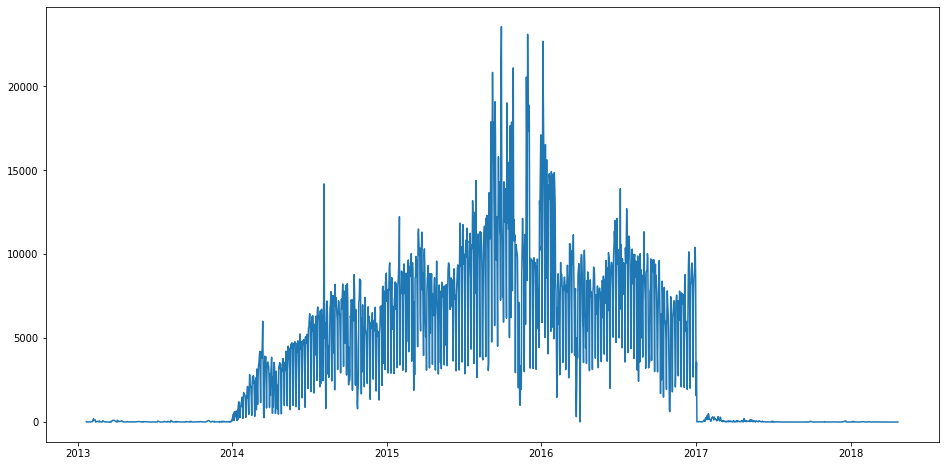

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(education_data)

In [9]:
from pyramid.arima import auto_arima

In [62]:
train_size = len(education_data)
print(train_size)

1537


In [63]:
train = education_data[:train_size]

training = train['Count']
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=27940.112, BIC=27966.758, Fit time=44.436 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=29665.425, BIC=29676.083, Fit time=1.969 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=29047.833, BIC=29069.150, Fit time=23.942 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=28058.413, BIC=28079.729, Fit time=21.148 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=27902.058, BIC=27934.033, Fit time=53.682 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=28618.703, BIC=28645.349, Fit time=20.875 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=28280.044, BIC=28317.348, Fit time=118.442 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=29090.871, BIC=29112.187, Fit time=19.302 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=28059.487, BIC=28102.120, Fit time=108.700 seconds


In [64]:
model.fit(training)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [65]:
n_predictions = 365

predictions = model.predict(n_periods=n_predictions)
# print(predictions)
# predictions = pd.DataFrame(predictions, index = test.index, columns=['Prediction'])

In [66]:
from datetime import datetime, timedelta
test_date = pd.date_range(education_data.index[-1], education_data.index[-1] + timedelta(days=364), freq='D')
test_date = pd.DataFrame(test_date, columns=['Date'])

In [67]:
test = pd.DataFrame(predictions, columns=['Predictions'])
test.index = test_date.Date

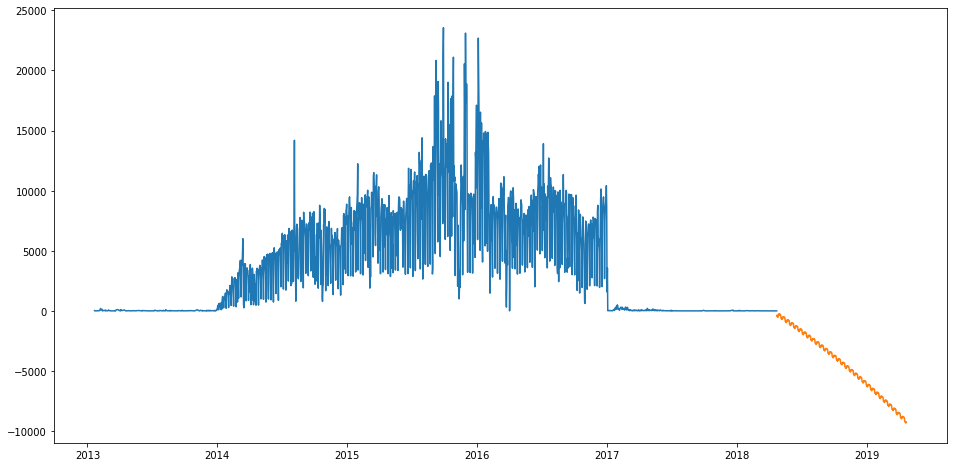

In [68]:
plt.figure(figsize=(16, 8))
plt.plot(education_data)
plt.plot(test)